## MNIST classification task

The MNIST data set is a database of handwritten digits that is commonly used for training various image processing systems. The goal if this task is to implement a classifier of handwritten digits using convolutional neural networks.

![Mnist data set](https://github.com/jirimaterna/image-processing-2days/blob/master/images/mnist-examples.png?raw=1)

## Load the data

The data is already shuffled and split to train and test parts.

In [1]:
import pickle
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train original shape: {}".format(X_train.shape))
print("y_train original shape: {}".format(y_train.shape))
print("X_test original shape: {}".format(X_test.shape))
print("y_test original shape: {}".format(y_test.shape))

X_train original shape: (60000, 28, 28)
y_train original shape: (60000,)
X_test original shape: (10000, 28, 28)
y_test original shape: (10000,)


Look at one random example.

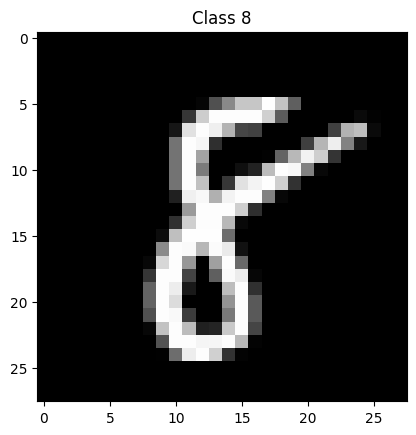

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
i=3495

#print(X_train[i])
plt.imshow(X_train[i], cmap='gray')
plt.title("Class {}".format(y_train[i]))
plt.show()

## Transform the data

We need to scale the input values to have the range (0,1).

In [3]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Reshape our data.

In [4]:
X_train3d = X_train.reshape(60000, 28, 28, 1)
X_test3d = X_test.reshape(10000, 28, 28, 1)

Transform the targets into one-hot encoding, i.e.
```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0]
```
etc.

In [5]:
from keras.utils import to_categorical

n_classes = 10

print(y_train[49])

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

print(y_train[49])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## Architecture definition

Create a sequential model and define its structure.

In [6]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Input((28, 28, 1, )))
model.add(Conv2D(32, kernel_size=(5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          46,090 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,922 (183.29 KB)

 Trainable params: 46,922 (183.29 KB)

 Non-trainable params: 0 (0.00 B)

Compile the model.

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Train the model

In [ ]:
model.fit(X_train3d, y_train,
          batch_size = 128, epochs = 10, verbose=1,
          validation_data=(X_test3d, y_test))

## Evaluate the model

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [10]:
print ("Test accuracy: {:.4f}".format(accuracy_score(y_test_class, y_pred_class)))
print ()
print(classification_report(y_test_class, y_pred_class, digits=4))

Test accuracy: 0.9872

              precision    recall  f1-score   support

           0     0.9799    0.9949    0.9873       980
           1     0.9921    0.9982    0.9952      1135
           2     0.9864    0.9835    0.9850      1032
           3     0.9921    0.9901    0.9911      1010
           4     0.9829    0.9959    0.9894       982
           5     0.9768    0.9933    0.9850       892
           6     0.9968    0.9770    0.9868       958
           7     0.9873    0.9854    0.9864      1028
           8     0.9806    0.9856    0.9831       974
           9     0.9959    0.9673    0.9814      1009

    accuracy                         0.9872     10000
   macro avg     0.9871    0.9871    0.9871     10000
weighted avg     0.9873    0.9872    0.9872     10000



In [11]:
print(confusion_matrix(y_test_class, y_pred_class))

[[ 975    0    2    0    0    1    0    1    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   1    3 1015    1    2    0    1    5    4    0]
 [   0    0    2 1000    0    6    0    0    2    0]
 [   0    0    0    0  978    0    1    0    2    1]
 [   2    0    0    3    0  886    1    0    0    0]
 [   9    2    0    0    2    7  936    0    2    0]
 [   0    2    6    2    1    0    0 1013    3    1]
 [   6    0    1    1    1    1    0    2  960    2]
 [   2    2    1    1   11    6    0    5    5  976]]


## Let's look at some incorrectly classified examples

In [12]:
y_pred = model.predict(X_test3d)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

incorrect_indices = np.nonzero(y_pred_class != y_test_class)[0]
print(incorrect_indices)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[  62  259  321  326  340  445  448  449  659  684  813  846  883  947
  965 1014 1039 1112 1182 1226 1232 1260 1319 1326 1393 1414 1530 1553
 1709 1717 1790 1878 1901 1982 2035 2098 2118 2129 2130 2135 2280 2293
 2329 2387 2406 2414 2454 2488 2582 2654 2720 2760 2896 2921 2939 2953
 2995 3030 3060 3073 3316 3384 3422 3503 3520 3534 3558 3559 3597 3599
 3727 3749 3762 3808 3838 3850 3869 3906 3985 4007 4075 4163 4176 4224
 4238 4248 4405 4536 4571 4731 4740 4761 4807 4814 4838 4956 5955 5973
 6011 6091 6166 6532 6569 6571 6576 6597 6625 6632 6651 7434 7886 8059
 8094 8408 9009 9015 9019 9530 9664 9679 9692 9698 9729 9770 9811 9839
 9879 9904]


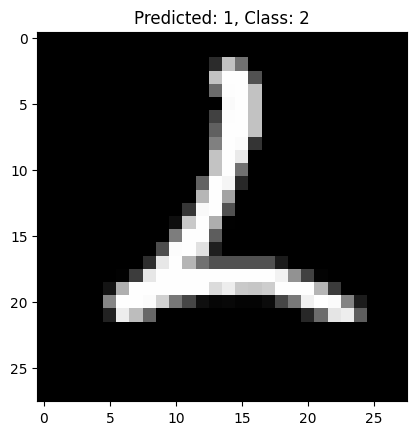

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
i = incorrect_indices[3]

plt.imshow(X_test[i], cmap='gray')
plt.title("Predicted: {}, Class: {}".format(y_pred_class[i], y_test_class[i]))
plt.show()